In [1]:
import numpy as np
import pprint
import networkx as nx

import matplotlib.pyplot as plt
from sklearn import cluster, datasets

In [3]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

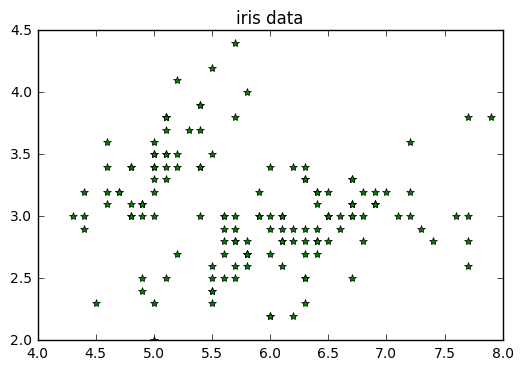

In [6]:
plt.figure(1)
plt.title("iris data")
plt.plot(X[:, 0], X[:, 1], 'g*')
plt.show()

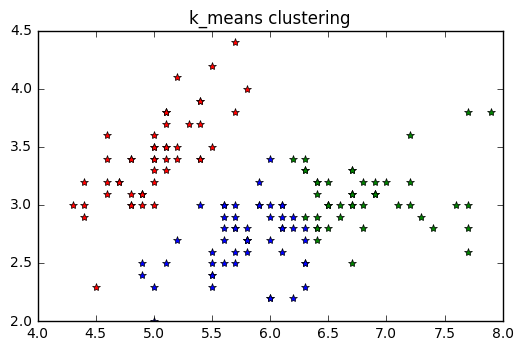

In [19]:
clusters_num = 3
k_means = cluster.KMeans(n_clusters=clusters_num)
col = ['b*', 'g*', 'r*', 'c*', 'm*', 'y*', 'k*', 'w*']
k_means.fit(X)
labels = k_means.labels_

plt.figure(2)
for i in range(clusters_num):
    plt.plot(X[labels == i, 0], X[labels == i, 1], col[i])

plt.title('k_means clustering')
plt.axes().set_aspect('equal')
plt.show()

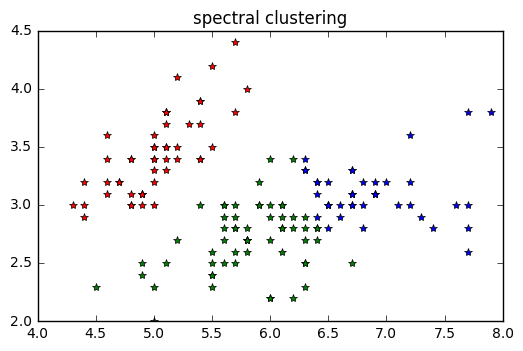

In [20]:
spectral_cls = cluster.SpectralClustering(n_clusters=clusters_num,
                                          eigen_solver='arpack',
                                          affinity='nearest_neighbors',
                                          n_neighbors=10)
spectral_cls.fit(X)
labels = spectral_cls.labels_

plt.figure(3)
for i in range(clusters_num):
    plt.plot(X[labels == i, 0], X[labels == i, 1], col[i])

plt.title('spectral clustering')
plt.axes().set_aspect('equal')
plt.show()